In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("hr-datasets/HR_Dataset.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df. isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [7]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
## Gráfico de barras para a vriavel attrition

In [14]:
print(df.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')


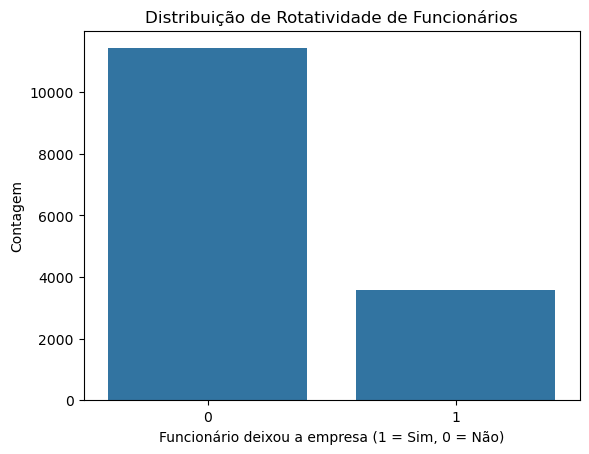

In [15]:
# Gráfico de barras para a variável 'Attrition'

sns.countplot(x='Attrition', data=df)
plt.title('Distribuição de Rotatividade de Funcionários')
plt.show()


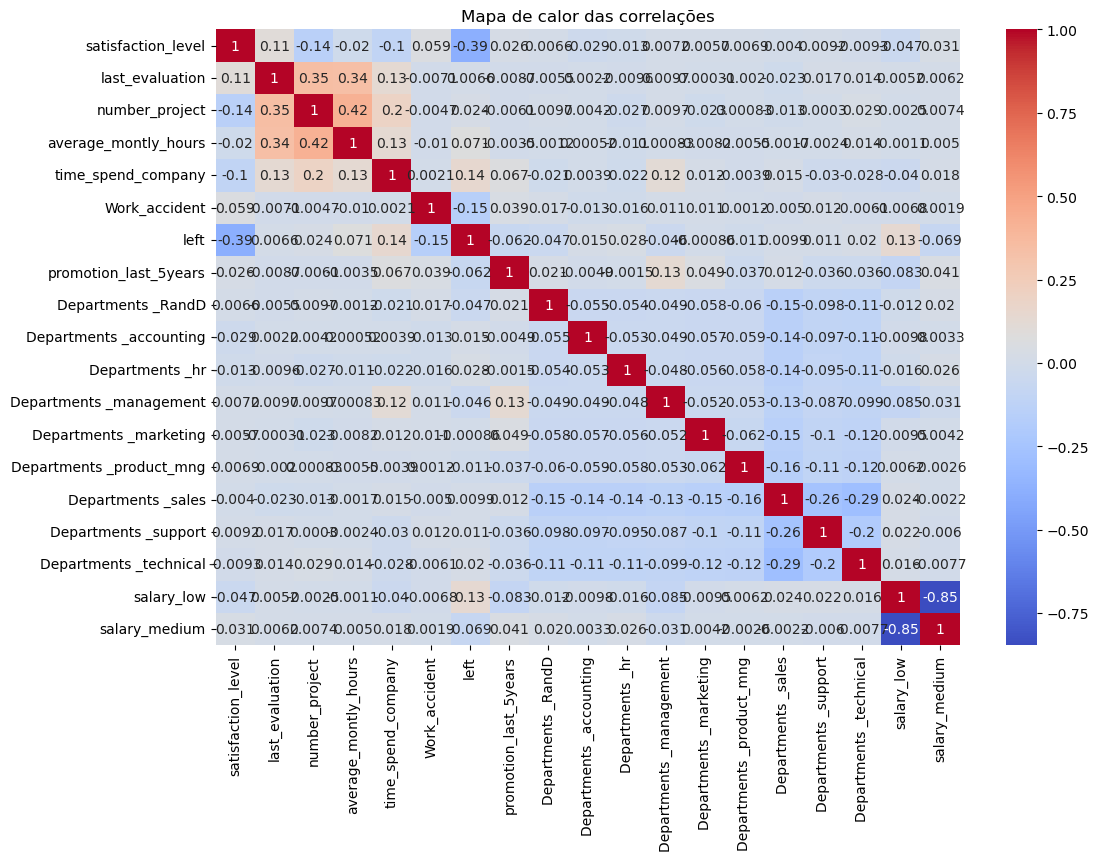

In [26]:
# Codificação de variáveis categóricas

df_encoded = pd.get_dummies(df, drop_first=True)

# Gerar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor das correlações')
plt.show()


In [27]:
df = pd.get_dummies(df, drop_first=True)

In [38]:
X = df.drop('left', axis=1)

In [29]:
y = df['left']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression

In [33]:
from sklearn.metrics import classification_report, accuracy_score

In [34]:
model = LogisticRegression()

In [45]:
# tive que escalar devido o numero maximo de iteração do logistic regression

from sklearn.preprocessing import StandardScaler

# Supondo que X_train seja um DataFrame do Pandas
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

model.fit(X_train_scaled, y_train)

# Para o conjunto de teste, escale da mesma forma e preserve o DataFrame
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

y_pred = model.predict(X_test_scaled)

In [47]:
# testar a previsão

y_pred = model.predict(X_test_scaled)

In [49]:
# aqui avaliei a accuracy do modelo

print(classification_report(y_test, y_pred))

# aqui tento medir a acuracia do modelo

print(f'Acurcia: {accuracy_score(y_test, y_pred):.2f}')

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.57      0.34      0.42       706

    accuracy                           0.78      3000
   macro avg       0.69      0.63      0.65      3000
weighted avg       0.76      0.78      0.76      3000

Acurcia: 0.78


In [51]:
# gerar o modelo PKL

import joblib

In [52]:
joblib.dump(model, 'modelo_de_rotatividade_rh.pkl')

['modelo_de_rotatividade_rh.pkl']

In [53]:
## Modelo gerado com sucesso, masisainda vou melhrando ele , pois 78% é apenas um score razoável !